# Modeling
### [1] 원핫 없이 통으로 학습 & 종목명 원핫 적용 후 학습 비교
### [2] 머신러닝 => 전체 돌리는 모듈로 상위 3개 정도 & 딥러닝 모델 비교

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [9]:
stock_df = pd.read_csv('./temp_data/concat_000020_동화약품.csv')

In [11]:
# 첫 5줄을 봅니다.
stock_df.head()

,날짜,시간,시가,고가,저가,종가,거래량,거래대금,누적체결매수수량,누적체결매도수량,...,상장주식수,시가총액,외국인주문한도수량,외국인주문가능수량,외국인현보유수량,외국인현보유비율,수정주가일자,수정주가비율,기관순매수량,기관누적순매수량
0,20221121,1530,8920.0,8920.0,8920.0,8920.0,4128.0,36820000.0,21105.0,101675.0,...,27931000,249144000000,27931470,26667255,1264215,4.53,20221121,100.0,-8301,83679
1,20221121,1520,8920.0,8920.0,8920.0,8920.0,605.0,5390000.0,16977.0,101675.0,...,27931000,249144000000,27931470,26667255,1264215,4.53,20221121,100.0,-8301,83679
2,20221121,1519,8920.0,8920.0,8920.0,8920.0,323.0,2880000.0,16977.0,101070.0,...,27931000,249144000000,27931470,26667255,1264215,4.53,20221121,100.0,-8301,83679
3,20221121,1518,8920.0,8920.0,8920.0,8920.0,734.0,6550000.0,16977.0,100747.0,...,27931000,249144000000,27931470,26667255,1264215,4.53,20221121,100.0,-8301,83679
4,20221121,1517,8920.0,8920.0,8920.0,8920.0,316.0,2820000.0,16977.0,100013.0,...,27931000,249144000000,27931470,26667255,1264215,4.53,20221121,100.0,-8301,83679


In [19]:
files_list = os.listdir('./temp_data/')
files_list = files_list[:2]
for file_name in tqdm(files_list):

    stock_info = pd.read_csv(f'./temp_data/{file_name}', index_col=0)
    
    code = 'A' + file_name.split('_')[-2]

    # 데이터 프레임에서 날짜 인덱스 추출
    date = stock_info.index.unique()

    # label 컬럼 추가 후 0으로 초기화
    stock_info['label'] = 0

    # 업데이트에 사용할 데이터 프레임 생성
    update_stock_info = pd.DataFrame()

    # labeling
    for day in date:

        # 특정일의 Data 추출
        select_day = stock_info.loc[day].copy()
        select_day['label'] = 0
        
        # 특정일의 Row 만큼 반복
        for row in range(len(select_day)):
            
            # 특정일의 현재 row 이후 최대 고가를 추출
            next_price = select_day[-row-1::-1]['고가'].max()

            # 추출한 최대 고가를 label 컬럼에 대입
            select_day.iloc[-row-1,-1] = next_price
            next_price = 0
        
        # 특정일 label이 추가된 DF를 업데이트할 DF에 concat
        update_stock_info = pd.concat([update_stock_info, select_day])

    update_stock_info.to_csv('./temp_data/label_{0}.csv'.format(code), encoding='utf-8-sig')

100%|██████████| 2/2 [01:13<00:00, 36.67s/it]


In [60]:
# def data_type_trans(stock_df):

#     stock_df = stock_df.astype({'시간':'uint16'})
#     stock_df = stock_df.astype({'시가':'uint32'})
#     stock_df = stock_df.astype({'고가':'uint32'})
#     stock_df = stock_df.astype({'저가':'uint32'})
#     stock_df = stock_df.astype({'종가':'uint32'})
#     stock_df = stock_df.astype({'전일대비':'int32'})
#     stock_df = stock_df.astype({'거래량':'uint32'})
#     stock_df = stock_df.astype({'거래대금':'uint64'})
#     stock_df = stock_df.astype({'누적체결매도수량':'uint64'})
#     stock_df = stock_df.astype({'상장주식수':'uint64'})
#     stock_df = stock_df.astype({'시가총액':'uint64'})
#     stock_df = stock_df.astype({'외국인주문한도수량':'uint64'})
#     stock_df = stock_df.astype({'외국인주문가능수량':'uint64'})
#     stock_df = stock_df.astype({'외국인현보유수량':'uint64'})
#     stock_df = stock_df.astype({'외국인현보유비율':'float32'})
#     stock_df = stock_df.astype({'수정주가일자':'uint32'})
#     stock_df = stock_df.astype({'수정주가비율':'float32'})
#     stock_df = stock_df.astype({'기관순매수량':'int64'})
#     stock_df = stock_df.astype({'기관누적순매수량':'int64'})
#     stock_df = stock_df.drop(['등락주선', '등락비율', '예탁금', '주식회전율', '거래성립률'], axis=1)
#     stock_df = stock_df.astype({'label':'uint32'})

#     stock_df.info()

#     return stock_df

In [61]:
# stock_df = data_type_trans(stock_df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189537 entries, 20221103 to 20201029
Data columns (total 20 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   시간         189537 non-null  uint16 
 1   시가         189537 non-null  uint32 
 2   고가         189537 non-null  uint32 
 3   저가         189537 non-null  uint32 
 4   종가         189537 non-null  uint32 
 5   전일대비       189537 non-null  int32  
 6   거래량        189537 non-null  uint32 
 7   거래대금       189537 non-null  uint64 
 8   누적체결매도수량   189537 non-null  uint64 
 9   상장주식수      189537 non-null  uint64 
 10  시가총액       189537 non-null  uint64 
 11  외국인주문한도수량  189537 non-null  uint64 
 12  외국인주문가능수량  189537 non-null  uint64 
 13  외국인현보유수량   189537 non-null  uint64 
 14  외국인현보유비율   189537 non-null  float32
 15  수정주가일자     189537 non-null  uint32 
 16  수정주가비율     189537 non-null  float32
 17  기관순매수량     189537 non-null  int64  
 18  기관누적순매수량   189537 non-null  int64  
 19  label      189

In [62]:
# trans = stock_df.loc[:,['고가','label']]
# trans = trans.rename(columns={'label':'pct_label'}).T

In [63]:
# get_trans = trans.pct_change().T.iloc[:,-1]
# get_trans

20221103    0.000000
20221103    0.000000
20221103    0.000000
20221103    0.000000
20221103    0.000000
              ...   
20201029    0.003861
20201029    0.005145
20201029    0.006433
20201029    0.007725
20201029    0.009019
Name: pct_label, Length: 189537, dtype: float64

In [64]:
# stock_df = pd.concat([stock_df, get_trans], axis=1)
# stock_df = stock_df.drop(['label'], axis=1)
# stock_df



,시간,시가,고가,저가,종가,전일대비,거래량,거래대금,누적체결매도수량,상장주식수,시가총액,외국인주문한도수량,외국인주문가능수량,외국인현보유수량,외국인현보유비율,수정주가일자,수정주가비율,기관순매수량,기관누적순매수량,pct_label
20221103,1530,216500,216500,216500,216500,0,12129,2625928000,210922,0,0,0,0,0,0.0,0,0.0,0,0,0.000000
20221103,1520,216800,216900,216700,216800,0,863,187072000,210922,0,0,0,0,0,0.0,0,0.0,0,0,0.000000
20221103,1519,216900,216900,216700,216800,0,1106,239789000,210524,0,0,0,0,0,0.0,0,0.0,0,0,0.000000
20221103,1518,216900,216900,216800,216800,0,461,99981000,210091,0,0,0,0,0,0.0,0,0.0,0,0,0.000000
20221103,1517,216600,216900,216600,216900,0,601,130274000,209993,0,0,0,0,0,0.0,0,0.0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20201029,905,37509,37557,37365,37461,0,1387,51942000,5773,0,0,0,0,0,0.0,0,0.0,0,0,0.003861
20201029,904,37413,37509,37317,37461,0,1810,67708000,4798,0,0,0,0,0,0.0,0,0.0,0,0,0.005145
20201029,903,37413,37461,37269,37461,0,2672,99978000,4464,0,0,0,0,0,0.0,0,0.0,0,0,0.006433
20201029,902,37221,37413,36980,37413,0,5894,219176000,3571,0,0,0,0,0,0.0,0,0.0,0,0,0.007725


In [65]:
# stock_df['pct_label'] = stock_df['pct_label'].mul(100)
# stock_df['pct_label'] = stock_df['pct_label'].round(0)
# stock_df

,시간,시가,고가,저가,종가,전일대비,거래량,거래대금,누적체결매도수량,상장주식수,시가총액,외국인주문한도수량,외국인주문가능수량,외국인현보유수량,외국인현보유비율,수정주가일자,수정주가비율,기관순매수량,기관누적순매수량,pct_label
20221103,1530,216500,216500,216500,216500,0,12129,2625928000,210922,0,0,0,0,0,0.0,0,0.0,0,0,0.0
20221103,1520,216800,216900,216700,216800,0,863,187072000,210922,0,0,0,0,0,0.0,0,0.0,0,0,0.0
20221103,1519,216900,216900,216700,216800,0,1106,239789000,210524,0,0,0,0,0,0.0,0,0.0,0,0,0.0
20221103,1518,216900,216900,216800,216800,0,461,99981000,210091,0,0,0,0,0,0.0,0,0.0,0,0,0.0
20221103,1517,216600,216900,216600,216900,0,601,130274000,209993,0,0,0,0,0,0.0,0,0.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20201029,905,37509,37557,37365,37461,0,1387,51942000,5773,0,0,0,0,0,0.0,0,0.0,0,0,0.0
20201029,904,37413,37509,37317,37461,0,1810,67708000,4798,0,0,0,0,0,0.0,0,0.0,0,0,1.0
20201029,903,37413,37461,37269,37461,0,2672,99978000,4464,0,0,0,0,0,0.0,0,0.0,0,0,1.0
20201029,902,37221,37413,36980,37413,0,5894,219176000,3571,0,0,0,0,0,0.0,0,0.0,0,0,1.0


In [77]:
stock_df = pd.read_csv('../data_min/A000020.csv')

In [78]:
stock_df.head()

,날짜,시간,시가,고가,저가,종가,거래량,거래대금,누적체결매수수량,누적체결매도수량,...,시가총액,외국인주문한도수량,외국인주문가능수량,외국인현보유수량,외국인현보유비율,수정주가일자,수정주가비율,기관순매수량,기관누적순매수량,pct_label
0,20221121,1530,8920.0,8920.0,8920.0,8920.0,4128.0,36820000.0,21105.0,101675.0,...,249144000000,27931470,26667255,1264215,4.53,20221121,100.0,-8301,83679,0.0
1,20221121,1520,8920.0,8920.0,8920.0,8920.0,605.0,5390000.0,16977.0,101675.0,...,249144000000,27931470,26667255,1264215,4.53,20221121,100.0,-8301,83679,0.0
2,20221121,1519,8920.0,8920.0,8920.0,8920.0,323.0,2880000.0,16977.0,101070.0,...,249144000000,27931470,26667255,1264215,4.53,20221121,100.0,-8301,83679,0.0
3,20221121,1518,8920.0,8920.0,8920.0,8920.0,734.0,6550000.0,16977.0,100747.0,...,249144000000,27931470,26667255,1264215,4.53,20221121,100.0,-8301,83679,0.0
4,20221121,1517,8920.0,8920.0,8920.0,8920.0,316.0,2820000.0,16977.0,100013.0,...,249144000000,27931470,26667255,1264215,4.53,20221121,100.0,-8301,83679,0.0


In [79]:
from sklearn.preprocessing import MinMaxScaler
def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)


In [80]:
X_stock_df = df.iloc[:,0:-1]
X_stock_df = MinMaxScaler(X_stock_df)

y_stock_df = df['pct_label']

In [81]:
# y_stock_df = to_categorical(y_stock_df)

In [82]:
X_stock_df

,날짜,시간,시가,고가,저가,종가,거래량,거래대금,누적체결매수수량,누적체결매도수량,...,상장주식수,시가총액,외국인주문한도수량,외국인주문가능수량,외국인현보유수량,외국인현보유비율,수정주가일자,수정주가비율,기관순매수량,기관누적순매수량
0,1.0,0.862826,0.049912,0.048766,0.051069,0.050322,0.003583,0.001330,0.065388,0.010165,...,0.0,0.047679,0.0,0.449141,0.550859,0.550971,1.0,0.0,0.405219,0.632240
1,1.0,0.849108,0.049912,0.048766,0.051069,0.050322,0.000525,0.000195,0.064903,0.010165,...,0.0,0.047679,0.0,0.449141,0.550859,0.550971,1.0,0.0,0.405219,0.632240
2,1.0,0.847737,0.049912,0.048766,0.051069,0.050322,0.000280,0.000104,0.064903,0.010104,...,0.0,0.047679,0.0,0.449141,0.550859,0.550971,1.0,0.0,0.405219,0.632240
3,1.0,0.846365,0.049912,0.048766,0.051069,0.050322,0.000637,0.000237,0.064903,0.010072,...,0.0,0.047679,0.0,0.449141,0.550859,0.550971,1.0,0.0,0.405219,0.632240
4,1.0,0.844993,0.049912,0.048766,0.051069,0.050322,0.000274,0.000102,0.064903,0.009999,...,0.0,0.047679,0.0,0.449141,0.550859,0.550971,1.0,0.0,0.405219,0.632240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232666,0.0,0.005487,0.562537,0.552496,0.566508,0.564073,0.000546,0.000402,0.065498,0.000316,...,0.0,0.685315,0.0,0.208030,0.791970,0.791262,0.0,0.0,0.574178,0.766744
232667,0.0,0.004115,0.553729,0.549627,0.560570,0.561147,0.005597,0.004096,0.065446,0.000297,...,0.0,0.685315,0.0,0.208030,0.791970,0.791262,0.0,0.0,0.574178,0.766744
232668,0.0,0.002743,0.559601,0.546758,0.560570,0.552370,0.001135,0.000828,0.064728,0.000263,...,0.0,0.685315,0.0,0.208030,0.791970,0.791262,0.0,0.0,0.574178,0.766744
232669,0.0,0.001372,0.556665,0.549627,0.563539,0.558221,0.002109,0.001543,0.064645,0.000203,...,0.0,0.685315,0.0,0.208030,0.791970,0.791262,0.0,0.0,0.574178,0.766744


In [83]:
X_stock_df.head()

,날짜,시간,시가,고가,저가,종가,거래량,거래대금,누적체결매수수량,누적체결매도수량,...,상장주식수,시가총액,외국인주문한도수량,외국인주문가능수량,외국인현보유수량,외국인현보유비율,수정주가일자,수정주가비율,기관순매수량,기관누적순매수량
0,1.0,0.862826,0.049912,0.048766,0.051069,0.050322,0.003583,0.001330,0.065388,0.010165,...,0.0,0.047679,0.0,0.449141,0.550859,0.550971,1.0,0.0,0.405219,0.63224
1,1.0,0.849108,0.049912,0.048766,0.051069,0.050322,0.000525,0.000195,0.064903,0.010165,...,0.0,0.047679,0.0,0.449141,0.550859,0.550971,1.0,0.0,0.405219,0.63224
2,1.0,0.847737,0.049912,0.048766,0.051069,0.050322,0.000280,0.000104,0.064903,0.010104,...,0.0,0.047679,0.0,0.449141,0.550859,0.550971,1.0,0.0,0.405219,0.63224
3,1.0,0.846365,0.049912,0.048766,0.051069,0.050322,0.000637,0.000237,0.064903,0.010072,...,0.0,0.047679,0.0,0.449141,0.550859,0.550971,1.0,0.0,0.405219,0.63224
4,1.0,0.844993,0.049912,0.048766,0.051069,0.050322,0.000274,0.000102,0.064903,0.009999,...,0.0,0.047679,0.0,0.449141,0.550859,0.550971,1.0,0.0,0.405219,0.63224


In [84]:
y_stock_df

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
            ...   
232666    0.322148
232667    0.332215
232668    0.342282
232669    0.332215
232670    0.365772
Name: pct_label, Length: 232671, dtype: float64

In [86]:
# 두 데이터를 리스트 형태로 저장
X = X_stock_df.values.tolist()
y = y_stock_df.values.tolist()

In [87]:
X[:5]

[[0.9999999000000099,
  0.8628257024691445,
  0.049911915149736266,
  0.048766489672978114,
  0.05106887850356346,
  0.05032182059684077,
  0.003583429404089903,
  0.0013300700370447432,
  0.06538819037385585,
  0.0101649425002113,
  0.4945735939534933,
  0.0,
  0.047679087717877176,
  0.0,
  0.449141102731314,
  0.550858797268696,
  0.5509708553487888,
  0.9999999000000099,
  0.0,
  0.40521939457957207,
  0.6322400661653995],
 [0.9999999000000099,
  0.8491082827160579,
  0.049911915149736266,
  0.048766489672978114,
  0.05106887850356346,
  0.05032182059684077,
  0.0005251876912486413,
  0.00019470607006168297,
  0.06490302288031623,
  0.0101649425002113,
  0.4945735939534933,
  0.0,
  0.047679087717877176,
  0.0,
  0.449141102731314,
  0.550858797268696,
  0.5509708553487888,
  0.9999999000000099,
  0.0,
  0.40521939457957207,
  0.6322400661653995],
 [0.9999999000000099,
  0.8477365407407493,
  0.049911915149736266,
  0.048766489672978114,
  0.05106887850356346,
  0.05032182059684077

In [88]:
y[:5]

[0.0, 0.0, 0.0, 0.0, 0.0]

In [89]:
window_size = 10

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_X.append(_X)
    data_y.append(_y)
print(_X, "->", _y)

[[0.0, 0.013717419753086556, 0.5684086337052319, 0.5553642588640332, 0.5724464985748275, 0.5669981878876592, 0.0007474158713472399, 0.0005508845210465056, 0.06586266255685475, 0.0007233180131696951, 0.7596898465116354, 0.0, 0.6853151897795468, 0.0, 0.20802972504834866, 0.7919701749516613, 0.791262030670987, 0.0, 0.0, 0.5741783273128881, 0.766743593153754], [0.0, 0.0123456777777779, 0.5713446287140398, 0.561101492943207, 0.5724464985748275, 0.564072500643657, 0.0013542029724758354, 0.001002429210428887, 0.06583680576214092, 0.0006592341366746331, 0.7596898465116354, 0.0, 0.6853151897795468, 0.0, 0.20802972504834866, 0.7919701749516613, 0.791262030670987, 0.0, 0.0, 0.5741783273128881, 0.766743593153754], [0.0, 0.010973935802469246, 0.5684086337052319, 0.5553642588640332, 0.5724464985748275, 0.5669981878876592, 0.00031077222060663405, 0.00022938470220624984, 0.06572761956991749, 0.0005961500086428324, 0.7596898465116354, 0.0, 0.6853151897795468, 0.0, 0.20802972504834866, 0.791970174951661

In [90]:
data_X[0]

[[0.9999999000000099,
  0.8628257024691445,
  0.049911915149736266,
  0.048766489672978114,
  0.05106887850356346,
  0.05032182059684077,
  0.003583429404089903,
  0.0013300700370447432,
  0.06538819037385585,
  0.0101649425002113,
  0.4945735939534933,
  0.0,
  0.047679087717877176,
  0.0,
  0.449141102731314,
  0.550858797268696,
  0.5509708553487888,
  0.9999999000000099,
  0.0,
  0.40521939457957207,
  0.6322400661653995],
 [0.9999999000000099,
  0.8491082827160579,
  0.049911915149736266,
  0.048766489672978114,
  0.05106887850356346,
  0.05032182059684077,
  0.0005251876912486413,
  0.00019470607006168297,
  0.06490302288031623,
  0.0101649425002113,
  0.4945735939534933,
  0.0,
  0.047679087717877176,
  0.0,
  0.449141102731314,
  0.550858797268696,
  0.5509708553487888,
  0.9999999000000099,
  0.0,
  0.40521939457957207,
  0.6322400661653995],
 [0.9999999000000099,
  0.8477365407407493,
  0.049911915149736266,
  0.048766489672978114,
  0.05106887850356346,
  0.05032182059684077

In [91]:
data_y[0]

0.003355704686725823

In [92]:
print('전체 데이터의 크기 :', len(data_X), len(data_y))

전체 데이터의 크기 : 232661 232661


In [93]:
train_size = int(len(data_y) * 0.7)
train_X = np.array(data_X[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_X = np.array(data_X[train_size : len(data_X)])
test_y = np.array(data_y[train_size : len(data_y)])

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

훈련 데이터의 크기 : (162862, 10, 21) (162862,)
테스트 데이터의 크기 : (69799, 10, 21) (69799,)


In [94]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [ ]:
X_train_lstm = X_train.reshape(X_train.shape[0], 9, 1)
X_test_lstm = X_test.reshape(X_test.shape[0], 9, 1)

In [103]:
len(train_y)

162862

In [105]:
model = Sequential()
model.add(LSTM(units=210, activation='relu', return_sequences=True, input_shape=(10, 21)))
# model.add(Dropout(0.1))
model.add(LSTM(units=20, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 10, 210)           194880    
                                                                 
 lstm_11 (LSTM)              (None, 20)                18480     
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 213,381
Trainable params: 213,381
Non-trainable params: 0
_________________________________________________________________


In [106]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_X, train_y, epochs=30, batch_size=500)
pred_y = model.predict(test_X)

Epoch 1/30
326/326 [==============================] - 30s 87ms/step - loss: 4.0594e-09 - accuracy: 0.2271
Epoch 2/30
326/326 [==============================] - 28s 85ms/step - loss: 4.0594e-09 - accuracy: 0.2271
Epoch 3/30
115/326 [=========>....................] - ETA: 17s - loss: 4.0586e-09 - accuracy: 0.2265

KeyboardInterrupt: 

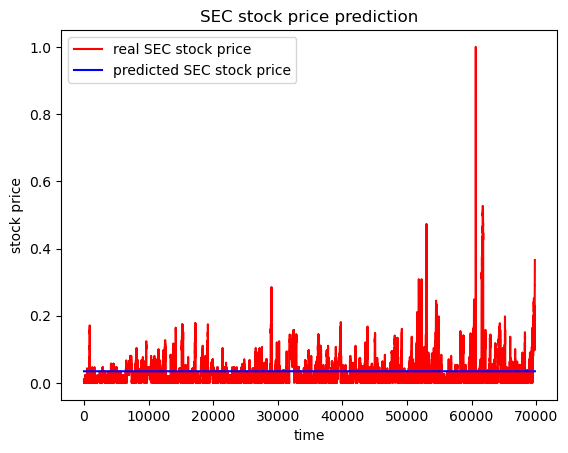

내일 SEC 주가 : [0.03471322] KRW


In [56]:
plt.figure()
plt.plot(test_y, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

print("내일 SEC 주가 :", y_stock_df.values[-1] * pred_y[-1] / y_stock_df.values[-1], 'KRW')

## 3. 원-핫 인코딩

In [75]:
# # 원-핫 인코딩 처리를 합니다.
# y_train = pd.get_dummies(y_train)
# y_test = pd.get_dummies(y_test)

## 4. 소프트맥스

In [76]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, LSTM

# # 모델 설정
# model = Sequential()
# model.add(Dense(1000,  input_dim=X_stock_df.shape[1], activation='relu'))
# model.add(LSTM(X_stock_df.shape[1], activation='tanh'))
# model.add(Dense(len(np.max(y_train)), activation='softmax')) # 답이랑 오차를 구하기 위해서 값의 총합을 1로 바꾸는 함수
# model.summary()

# # 모델 컴파일
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # 모델 실행
# history=model.fit(X_train, y_train, epochs=30, batch_size=100, validation_data=(X_test, y_test))

# model.evaluate(X_test, y_test)[1]

In [77]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [78]:
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

X_train_lstm = X_train.reshape(X_train.shape[0], 9, 1)
X_test_lstm = X_test.reshape(X_test.shape[0], 9, 1)


In [80]:
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [81]:
print(y_train.shape)
print(X_train_lstm.shape)
print(X_train_lstm)

(151629, 30)
(151629, 9, 1)
[[[8.23045267e-03]
  [7.86890673e-01]
  [7.84899179e-01]
  ...
  [2.20477295e-03]
  [2.22881129e-03]
  [2.67014928e-03]]

 [[1.50891632e-02]
  [2.05362907e-01]
  [2.05489406e-01]
  ...
  [5.15983814e-03]
  [1.99019300e-03]
  [8.04289320e-03]]

 [[4.59533608e-01]
  [6.85508566e-01]
  [6.83748121e-01]
  ...
  [4.91984567e-04]
  [4.44236719e-04]
  [2.61892746e-02]]

 ...

 [[4.37585734e-01]
  [2.14114872e-01]
  [2.13428732e-01]
  ...
  [1.47153279e-04]
  [5.81129836e-05]
  [1.96763375e-02]]

 [[2.77091907e-01]
  [2.29239427e-01]
  [2.28518818e-01]
  ...
  [1.95151773e-04]
  [8.02499223e-05]
  [3.37647451e-02]]

 [[5.88477366e-01]
  [3.47016469e-01]
  [3.46027447e-01]
  ...
  [1.88583558e-03]
  [1.01281985e-03]
  [1.77202585e-01]]]


In [82]:
y_train.shape

(151629, 30)

In [83]:
y_test.shape

(37908, 29)

In [84]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [85]:

# 모델 설정
model = Sequential()
model.add(LSTM(100, input_shape=(9, 1), activation='tanh'))
model.add(Dense(30, activation='softmax')) # 답이랑 오차를 구하기 위해서 값의 총합을 1로 바꾸는 함수
model.summary()

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 실행
history=model.fit(X_train_lstm, y_train, epochs=10, batch_size=200,verbose=1)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100)               40800     
                                                                 
 dense_3 (Dense)             (None, 30)                3030      
                                                                 
Total params: 43,830
Trainable params: 43,830
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
759/759 [==============================] - 9s 10ms/step - loss: 1.4196 - accuracy: 0.4530
Epoch 2/10
759/759 [==============================] - 7s 10ms/step - loss: 1.3296 - accuracy: 0.4516
Epoch 3/10
759/759 [==============================] - 7s 9ms/step - loss: 1.3138 - accuracy: 0.4538
Epoch 4/10
759/759 [==============================] - 7s 9ms/step - loss: 1.3038 - accuracy: 0.4551
Epoch 5/10
759/759 [========================

In [86]:
model.evaluate(X_test, y_test)[1]

ValueError: in user code:

    File "c:\Users\TJ\.conda\envs\tf2\lib\site-packages\keras\engine\training.py", line 1727, in test_function  *
        return step_function(self, iterator)
    File "c:\Users\TJ\.conda\envs\tf2\lib\site-packages\keras\engine\training.py", line 1713, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\TJ\.conda\envs\tf2\lib\site-packages\keras\engine\training.py", line 1701, in run_step  **
        outputs = model.test_step(data)
    File "c:\Users\TJ\.conda\envs\tf2\lib\site-packages\keras\engine\training.py", line 1667, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\TJ\.conda\envs\tf2\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "c:\Users\TJ\.conda\envs\tf2\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\TJ\.conda\envs\tf2\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\TJ\.conda\envs\tf2\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\TJ\.conda\envs\tf2\lib\site-packages\keras\losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\TJ\.conda\envs\tf2\lib\site-packages\keras\backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 29) and (None, 30) are incompatible


In [87]:
predict = model.predict(X_test)

1185/1185 [==============================] - 3s 2ms/step


In [88]:
predict[0]

array([4.8381639e-01, 4.3230313e-01, 5.3997647e-02, 1.6783347e-02,
       6.1454005e-03, 2.7106672e-03, 4.3751349e-04, 4.2962364e-04,
       7.2569307e-04, 1.1007010e-03, 1.2254004e-03, 2.9316035e-04,
       1.8709008e-05, 7.9193306e-08, 2.7596073e-08, 6.3787660e-09,
       1.3194931e-08, 1.2422782e-08, 3.0333052e-08, 6.7165344e-09,
       3.3333343e-08, 5.4724342e-08, 1.1763088e-08, 2.2895857e-07,
       1.2161523e-07, 5.0924804e-08, 1.5453077e-06, 8.5699867e-06,
       1.6611491e-06, 1.5135231e-07], dtype=float32)

In [89]:
predict.index(predict[0][0].max())

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [90]:
# for i,rate  in enumerate(predict):
#     for i, ra in enumerate(rate):
#         if rate.max() == ra:
#             print(i)

print(list(map(np.argmax, predict)))

[0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 